In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
measure = np.load(r'C:\Users\nandu\Desktop\Class notes\Remote sensing\assignment 3\measurements.npy')
trans = np.load(r'C:\Users\nandu\Desktop\Class notes\Remote sensing\assignment 3\transmit_wfm.npy')
pixel = np.load(r'C:\Users\nandu\Desktop\Class notes\Remote sensing\assignment 3\pixels.npy')
tx = np.load(r'C:\Users\nandu\Desktop\Class notes\Remote sensing\assignment 3\tx_coords.npy')
rx = np.load(r'C:\Users\nandu\Desktop\Class notes\Remote sensing\assignment 3\rx_coords.npy')
gt= np.load(r'C:\Users\nandu\Desktop\Class notes\Remote sensing\assignment 3\scene.npy')

In [4]:

speed = 344.351
s_freq = 100000.00

In [5]:
#matched filtering
mf = signal.correlate(measure[0,:],trans,mode='valid',method='direct')
len(mf)

901

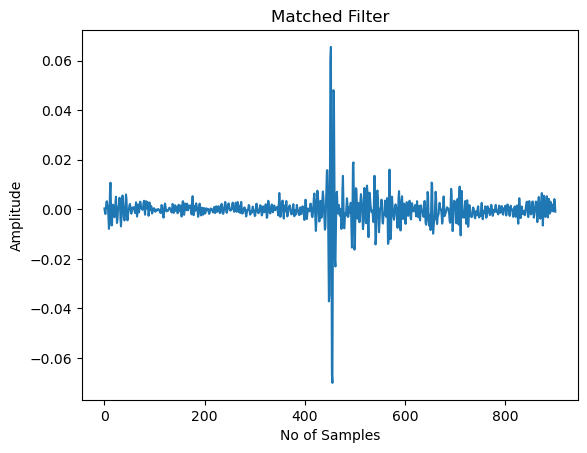

In [6]:
#plotting the Matched filter
plt.plot(mf)
plt.title("Matched Filter")
plt.xlabel('No of Samples')
plt.ylabel('Amplitude')
plt.show()

C:\Users\nandu\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


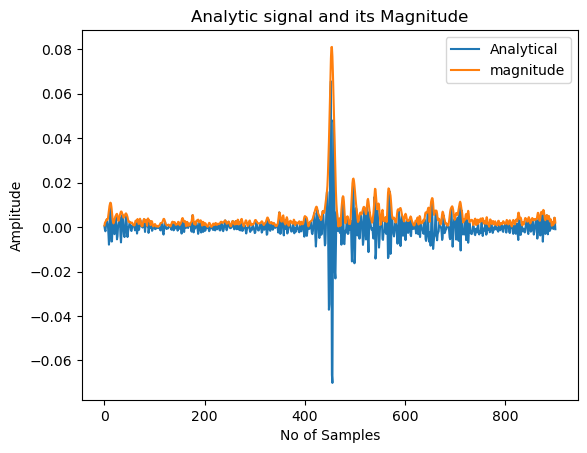

In [7]:
#Plotting the analytical signal and its magnitude
hil = signal.hilbert(mf)
plt.plot(hil,label='Analytical')
plt.plot(np.abs(hil),label='magnitude')
plt.title('Analytic signal and its Magnitude')
plt.xlabel('No of Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

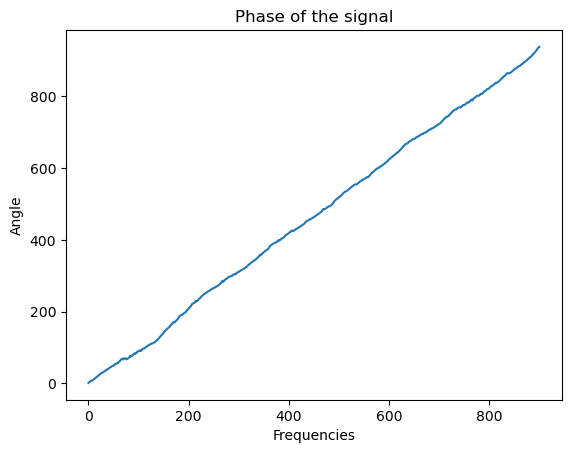

In [8]:
#plotting the phase
plt.plot((np.unwrap(np.angle(hil))),label='magnitude')
plt.title('Phase of the signal')
plt.xlabel('Frequencies')
plt.ylabel('Angle')

plt.show()

In [145]:
all_mf = np.zeros([360,901]).astype(np.cdouble)
for i in range(len(measure)):
    all_mf[i,:]= signal.hilbert(signal.correlate(measure[i,:],trans,mode='valid',method='direct'))

    


In [146]:
def beamformer(me,p,t,r):
    pix = np.zeros(gt.shape).astype(np.cdouble)
    for i in range(len(tx)):
        for j in range(len(pix)):
            rx_px = np.sqrt(np.sum((rx[i,:]-pixel[j,:])**2))
            px_tx = np.sqrt(np.sum((tx[i,:]-pixel[j,:])**2))
            tof =  (rx_px+px_tx)/speed
            index = int((tof*s_freq))
            
            pix[j] = pix[j]+all_mf[i,index]
    
    return(pix)   

In [147]:
pix=beamformer(measure,pixel,tx,rx)

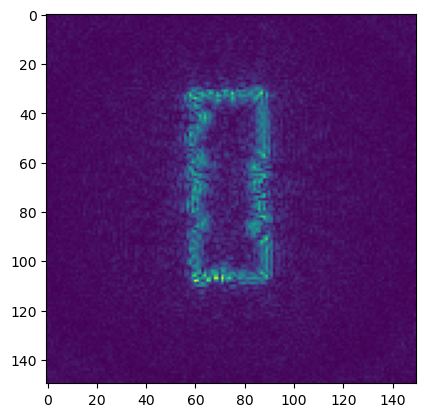

In [148]:
result=pix.reshape(150,150)
plt.imshow(np.abs(result))
plt.show()

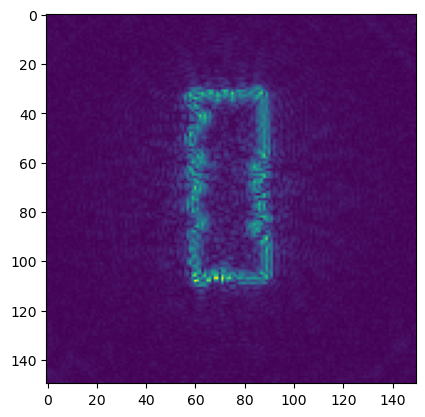

In [93]:

result=gt.reshape(150,150)
plt.subplot()
plt.imshow((result))


In [95]:
gt.shape

(22500,)